# Amazon deforestation causes strong regional warming

Edward W. Butt1*, Jessica C. A. Baker1, Francisco G. Silva Bezerra2, Celso von Randow2, Ana P. D. Aguiar2, 3 and Dominick V. Spracklen1

1. School of Earth and Environment, University of Leeds, Leeds, UK
2. National Institute for Space Research (INPE), São José dos Campos, Brazil.
3. Stockholm Resilience Centre, Stockholm, Sweden.

*Correspondence to Edward W. Butt: e.butt@leeds.ac.uk


### Code to reproduce Figure 2 in the main paper

* Data used to run this code can be downloaded from: https://doi.org/10.5518/1325
* README.txt found at the same address describes the data

To run this code, you will need the correct packages installed on your system. You may want to create the following conda environment:


conda create -n plotdata -c conda-forge -c python jupyterlab numpy pandas matplotlib seaborn jupyter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_loss_data(distanceOption, letters = ['A','B','C','D','E']):
    '''Function to filter data points as a 
    function of forest loss at different length scales'''
    lossData = []
    for binIndex, binn in enumerate( sorted(df['local_bin'].unique()) ):
        if binIndex == 0: 
            noLoss = binn
            
        if distanceOption == 'local':
            data = df[ (df['local_bin']==binn) & (df['regional_2_10_bin']==noLoss) & (df['regional_10_100_bin']==noLoss) ]    
            
        elif distanceOption == 'regional_2_10':
            data = df[ (df['local_bin']==binn) & (df['regional_2_10_bin']==binn) & (df['regional_10_100_bin']==noLoss) ]
        
        elif distanceOption == 'regional_2_100':
            data = df[ (df['local_bin']==binn) & (df['regional_2_10_bin']==binn) & (df['regional_10_100_bin']==binn) ]
        
        data[letters[binIndex]] = data['Delta_T']
        lossData.append(data)
        
    return lossData 

In [3]:
def add_median_labels(ax, fmt='.1f'):
    
    '''Function to add median value labels to boxplots '''
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
   
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        
        text = ax.text(x, y, str(round(y,2)), ha='center', va='center',
                       fontweight='bold', color='white', fontsize=12)
        print(text)
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

### Open dataset

In [4]:
df = pd.read_csv('Dataset_butt_etal.csv')

In [5]:
df.head()

lat     lon  Latitude_rescale  Elevation_rescale  \
0   2.825 -68.335          0.766579           0.242639   
1  -3.995 -48.025          0.542679           0.253007   
2  -7.315 -55.255          0.433684           0.528292   
3  -8.955 -54.245          0.379842           0.758576   
4 -16.405 -60.475          0.135259           0.720493   

   Distance_coast_rescale  local_0-2km_start  regional_2-5km_start  \
0                0.508327              0.985                  0.99   
1                0.159400              0.860                  0.79   
2                0.527255              0.770                  0.79   
3                0.582676              0.980                  0.99   
4                0.706369              0.925                  0.91   

   regional_5-10km_start  regional_10-25km_start  regional_25-50km_start  ...  \
0                   0.99                    0.99                    0.97  ...   
1                   0.73                    0.75                    0.75  ...   
2                   0.77                    0.87                    0.89  ...   
3                   0.99                    0.99                    0.96  ...   
4                   0.92                    0.89                    0.70  ...   

   regional_5-10km_end  regional_10-25km_end  regional_25-50km_end  \
0                 0.99                  0.99                  0.97   
1                 0.33                  0.44                  0.50   
2                 0.39                  0.51                  0.64   
3                 0.99                  0.98                  0.92   
4                 0.80                  0.67                  0.56   

   regional_50-100km_end   Delta_T  regional_2-10km_start  \
0                   0.95 -0.727778                  0.990   
1                   0.52  0.532636                  0.760   
2                   0.76  1.826663                  0.780   
3                   0.83  0.088342                  0.990   
4                   0.60  0.943321                  0.915   

   regional_2-10km_end  regional_10-100km_start  regional_10-100km_end  \
0                0.990                 0.973333               0.970000   
1                0.450                 0.740000               0.486667   
2                0.460                 0.906667               0.636667   
3                0.990                 0.950000               0.910000   
4                0.835                 0.760000               0.610000   

   train_test_split  
0             train  
1             train  
2             train  
3             train  
4             train  

[5 rows x 23 columns]

In [6]:
df.columns

Index(['lat', 'lon', 'Latitude_rescale', 'Elevation_rescale',
       'Distance_coast_rescale', 'local_0-2km_start', 'regional_2-5km_start',
       'regional_5-10km_start', 'regional_10-25km_start',
       'regional_25-50km_start', 'regional_50-100km_start', 'local_0-2km_end',
       'regional_2-5km_end', 'regional_5-10km_end', 'regional_10-25km_end',
       'regional_25-50km_end', 'regional_50-100km_end', 'Delta_T',
       'regional_2-10km_start', 'regional_2-10km_end',
       'regional_10-100km_start', 'regional_10-100km_end', 'train_test_split'],
      dtype='object')

Assign name of target variable

In [7]:
target = 'Delta_T'

Calculate forest fraction change or loss between local (0-2 km) and two coarse regional halo features: 2-10 km and 10-100 

In [8]:
df['local_0-2km_change'] = (df['local_0-2km_start'] - df['local_0-2km_end']) * 100.
df['regional_2-10km_change'] = (df['regional_2-10km_start'] - df['regional_2-10km_end']) * 100.
df['regional_10-100km_change'] = (df['regional_10-100km_start'] - df['regional_10-100km_end']) * 100.

Need to convert zero values to a very small number, so they can be binned

In [9]:
df['local_0-2km_change'][df['local_0-2km_change'] == 0.0] = 0.001
df['regional_2-10km_change'][df['regional_2-10km_change'] == 0.0] = 0.001
df['regional_10-100km_change'][df['regional_10-100km_change'] == 0.0] = 0.001

Bin the data into different forest loss bins

In [10]:
# Bins
bins = np.arange(0,60,10)

# Bin the data
df['local_bin'] = pd.cut(df['local_0-2km_change'], bins=bins)
df['regional_2_10_bin'] = pd.cut(df['regional_2-10km_change'], bins=bins)
df['regional_10_100_bin'] = pd.cut(df['regional_10-100km_change'], bins=bins)

# Drop all NaN values
df = df.dropna()

Prepare data for plotting

In [11]:
localData = pd.concat([get_loss_data('local')[0]['A'],
                        get_loss_data('local')[1]['B'],
                        get_loss_data('local')[2]['C'],
                        get_loss_data('local')[3]['D'],
                        get_loss_data('local')[4]['E']], ignore_index=True, axis=1).assign(Location=1)

local_regional_2_10_Data = pd.concat([get_loss_data('regional_2_10')[1]['B'],
                        get_loss_data('regional_2_10')[2]['C'],
                        get_loss_data('regional_2_10')[3]['D'],
                        get_loss_data('regional_2_10')[4]['E']], ignore_index=True, axis=1).assign(Location=2)

local_regional_2_100_Data = pd.concat([get_loss_data('regional_2_100')[1]['B'],
                        get_loss_data('regional_2_100')[2]['C'],
                        get_loss_data('regional_2_100')[3]['D'],
                        get_loss_data('regional_2_100')[4]['E']], ignore_index=True, axis=1).assign(Location=3)


In [12]:
localData = localData.set_axis(['No loss (<10%)','10-20% loss', '20-30% loss', '30-40% loss', '40-50% loss', 'Location'], axis='columns', inplace=False)
local_regional_2_10_Data = local_regional_2_10_Data.set_axis(['10-20% loss', '20-30% loss', '30-40% loss', '40-50% loss', 'Location'], axis='columns', inplace=False)
local_regional_2_100_Data = local_regional_2_100_Data.set_axis(['10-20% loss', '20-30% loss', '30-40% loss', '40-50% loss', 'Location'], axis='columns', inplace=False)

Melt data into one dataframe, so we can plot it

In [13]:
mdf = pd.melt(pd.concat([localData, local_regional_2_10_Data, local_regional_2_100_Data]) 
              , id_vars=['Location'], var_name=['Letter'])

### Plot data

Text(-0.32, 0.3233006862448926, '0.32')
Text(-0.16, 0.6300496239667825, '0.63')
Text(0.0, 0.8700415107578197, '0.87')
Text(0.15999999999999998, 1.1025084944160182, '1.1')
Text(0.32, 1.2541660719339358, '1.25')
Text(0.84, 0.921085620439102, '0.92')
Text(1.0, 1.1916198839065448, '1.19')
Text(1.16, 1.7689205553655585, '1.77')
Text(1.32, 1.900274942943526, '1.9')
Text(1.84, 1.097809085782755, '1.1')
Text(2.0, 1.928421011880621, '1.93')
Text(2.16, 3.129407394125757, '3.13')
Text(2.32, 4.370000599492684, '4.37')


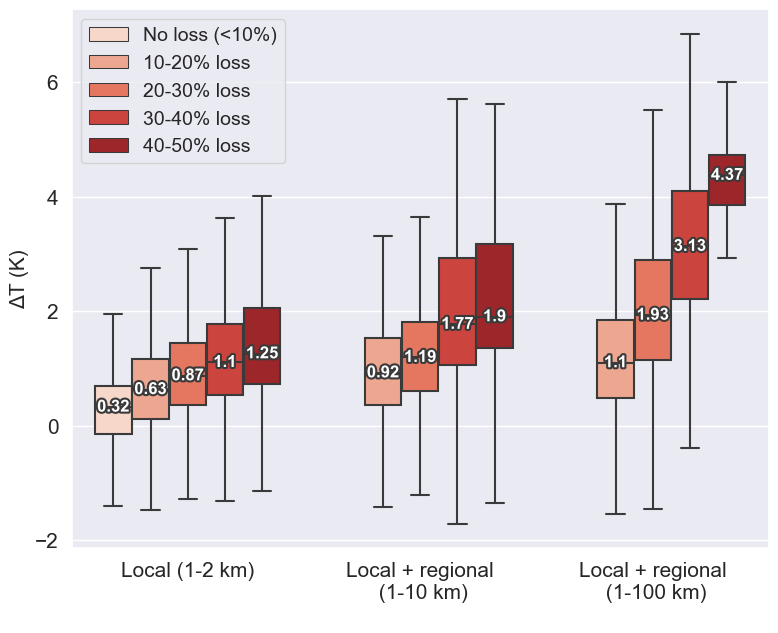

In [14]:
sns.set_theme()
fig, ax = plt.subplots(figsize=[9, 7])
sns.boxplot(x="Location", y="value", hue="Letter", data=mdf, showfliers = False, ax=ax, palette="Reds") 

ax.set_ylabel('\u0394T (K)', fontsize=15)
ax.set_xlabel(' ')
plt.legend(loc=2, prop={'size':14})
    
ax.set_xticklabels(['Local (1-2 km)','Local + regional\n (1-10 km)','Local + regional\n (1-100 km)'], minor=False)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)

add_median_labels(ax)

plt.show()